In [ ]:
# Import numpy library for math operations
import numpy as np

# Tipos de problemas
Los problemas de aprendizaje supervisado de categorizan en 'Regresión' o 'Calsifiación. En un problema de regresión, intentamos predecir resultados sobre una salida de tipo continua, esto quiere decir que se intente mapear las variables de entrada con un resultado de salida sobre una funcioón continua.
En el caso de los problemas de clasificación, lo que se busca es predecir resultados dentre de una salida discreta. En otras palabras, queremos mapear las variables de entrada entre N categorías discretas.

# Regresión lineal con una variable

Los problemas de regresión lineal con una variable, se conocen como 'Univariate linear regression', y consisten en predecir una salida para una entrada conformada por solo una variable (x).

# Función de hipótesis
La función de hipótesis es la que nos dará el resultado predecido. Se calcula según el valor de entrada (x) y N parámetros configurables.
Esta función, para una única variable tiene el aspecto siguiente:

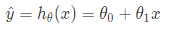


# Regresión

# Regresión lineal con una variable

Los problemas de regresión lineal con una variable, se conocen como 'Univariate linear regression', y consisten en predecir una salida para una entrada conformada por solo una variable (x).

# Función de hipótesis
La función de hipótesis es la que nos dará el resultado predecido. Se calcula según el valor de entrada (x) y N parámetros configurables.
Esta función, para una única variable tiene el aspecto siguiente:

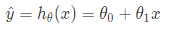


In [ ]:
outputVals = np.array([4, 7, 7, 8])
inputVariables = np.array([0, 1, 2, 3])

# Si nuestros parámetros son por ejemplo 2 y 2, para la función de hipótesis obtendríamos lo siguiente H0 = 2 + 2x

vectorizedFunction = np.vectorize(lambda n: 2+2*n)
hypotesis = vectorizedFunction(inputVariables)
print("Returned hypotesis: "+str(hypotesis))
print("Expected values:    "+str(outputVals))

Returned hypotesis: [2 4 6 8]
Expected values:    [4 7 7 8]


Como vemos, los resultados de las hipótesis difieren mucho de los resultados esperados. Para conseguir mejores resultados, debemos jugar con el valor de los parámetros en busca de aquellos que se '**ajusten**' mejor.

Para medir como de lejos del resultado esperado, y asi poder obtener información sobre como debemos ajustar los parámetros, se utiliza una **función de coste**. Esta fórmula tiene en cuenta la media de todos los resultados para las hipótesis con entradas x's comparadas con las salidas esperadas y's:

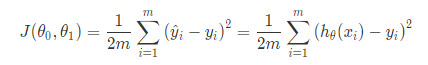



De forma más simple, la podemos ver como $\frac{1}{2}*\bar{x}$.

Donde $\bar{x}$ es la media de los cuadrados de $h_\theta(X_i) - y_i$ o la diferencia entre el valor predecido y el valor real.
Está función se conoce como '**Error cuadrádico medio**'.

Si intentamos ver el objetivo de una forma gráfica, sería el de encontrar una línea recta (definida por $h_\theta$), que pase entre la nube de puntos definida por nuestros datos. Lo que buscamos es la línea que mejor se acerque a la mayor parte del conjunto. Esto es, que la media de los cuadrados de la distancia predicha y la distancia real sea mínima.
En el caso ideal $J(\theta_0, \theta_1)=0$.

Para conseguir minimizar la media, debemos actualizar de forma iterativa los valores de $\theta_0$ y $\theta_1$ hasta que converjan.

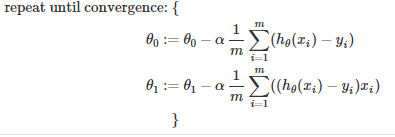

El parámetro $\alpha$, indica como de grandes serán los 'saltos' o variaciones que vamos a ir haciendo de los parámetros. Si hacemos variaciones demasiado pequeñas, el tiempo de convergencia puede ser demasiado alto, pero si hacemos variaciones demasiado grandes, puede que pasemos por alto el mínimo y nuestra función no converja nunca.


In [ ]:
# alpha is de coeficient 
alpha = 0.1
# m is the number of training examples
m = 4
# We update the hypothesis function to be parameter dependent
thetaZero = 2
thetaOne = 2
vectorizedFunction = np.vectorize(lambda n: thetaZero+thetaOne*n)
# print(str((vectorizedFunction(inputVariables)*inputVariables)))
# hypotesis = vectorizedFunction(inputVariables)

converged = False
while not converged:
  vectorizedFunction = np.vectorize(lambda n: thetaZero+thetaOne*n)
  
  tempThetaZero = thetaZero
  thetaZero = thetaZero - alpha*(1/m)*np.sum((vectorizedFunction(inputVariables)-outputVals))

  tempThetaOne = thetaOne
  thetaOne = thetaOne - alpha*(1/m)*np.sum(((vectorizedFunction(inputVariables)-outputVals)*inputVariables))

  convergedOne = (tempThetaOne==thetaOne)
  convergedZero = (tempThetaZero==thetaZero)
  converged = convergedOne and convergedZero

  if(thetaOne==0 or thetaOne<0):
    converged = True
  if(thetaZero==0 or thetaZero<0):
    converged = True

  # print("ThetaOne is now "+ str(thetaOne))
  # print("ThetaZero is now "+ str(thetaZero))


print("0: "+str(thetaZero)+" 1: "+str(thetaOne))

0: 4.699999999999987 1: 1.200000000000006


In [ ]:
vectorizedFunction = np.vectorize(lambda n: thetaZero+thetaOne*n)
hypotesis = np.trunc(vectorizedFunction(inputVariables))
print("Returned hypotesis: " + str(hypotesis))
print("Expected values:    " + str(outputVals))

Returned hypotesis: [4. 5. 7. 8.]
Expected values:    [4 7 7 8]


# Regresión con múltiples variables

Una **función de hipótesis** con varias variables, se puede definir como:

$h_\theta(x) = \theta_0 + \theta_1 x_1+ \theta_2 x_1+ ... + \theta_n x_n$

Para entender la función, de forma básica, podemos ver a $\theta_0$ como, por ejemplo, el precio base de una casa. $\theta_1$ puede ser el precio por metro cuadrado, $\theta_2$ el precio por cada planta que tenga la casa, etc.
Por otro lado, siguiendo el mismo ejemplo, $x_1$ sería el número de metros cuadrados de una casa en concreto, $x_2$ el número de plantas de la casa, y así sucesivamente.



## Función de coste

La función de coste, actualizada a N variables, quedaría de la siguiente forma, si entendemos $\theta$ como el vector con las diferentes características:

$J(\theta) = \frac{1}{2m}\sum_{i=1}^m{(h_\theta(x_i)-y_i)^2}$

Al igual que en el caso de una sola variable, buscamos minimizar este coste. Esto lo haremos iterando y actualizando los valores de $\theta_i$ hasta que converjan:


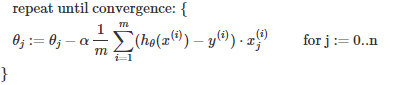

## Normalización de las entradas
Podemos agilizar el proceso de **descenso de gradiente**, normalizando los valores de las entradas. Esto es, conseguir que los rangos de los elementos de entrada se muevan entre unos límites controlados. Una forma de normalizar, es usando la media:

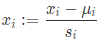

Donde $\mu_i$ es la media de todos los valores para la característica i y $s_i$ es el rango de valores (max-min) o, en su defecto, la desviación estándar.

# Ejemplo con TensorFlow



In [ ]:
# Use seaborn for pairplot
!pip install seaborn



> El ejemplo lo vamos a hacer utilizando el API de keras, de mayor alto nivel, permitiendo implementar un modelo más fácilmente.



In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0


## Descarga y procesado de los datos

Descargamos el dataset con el que vamos a entrenar

In [ ]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

Pandas, es una librería que nos permite trabajar con csv's y conjuntos de datos como si fueran tablas. Esto nos permite hacer consultas sobre los datasets, y quitar información para luego plantear las características.

In [ ]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


El dataset escogido, posee información sobre modelos de coches

In [ ]:
dataset.isna().sum() # Esto revisa si hay valores nulos NaN y demás

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset = dataset.dropna() # Podemos eliminar esos datos corruptos o que no nos interesan

In [ ]:
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


Ahora divida el set de datos en un set de entrenamiento y otro de pruebas.
Usaremos el set de pruebas en la evaluacion final de nuestro modelo.

In [ ]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

Revise rapidamente la distribucion conjunta de un par de columnas de el set de entrenamiento.

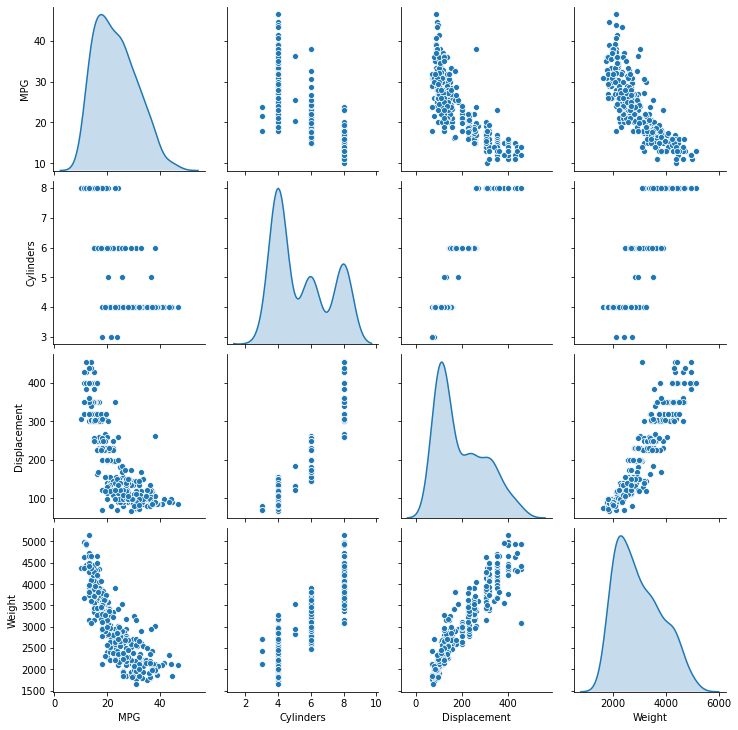

In [ ]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

Estadísticas generales del conjunto:

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [ ]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

Es una buena práctica normalizar funciones que utilizan diferentes escalas y rangos. Aunque el modelo * podría * converger sin normalización de características, dificulta el entrenamiento y hace que el modelo resultante dependa de la elección de las unidades utilizadas en la entrada.

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

Estos datos normalizados es lo que usaremos para entrenar el modelo.

## Construcción del modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo secuencial con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo. Los pasos de construcción del modelo se envuelven en una función, build_model, ya que crearemos un segundo modelo, más adelante.

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

Use el método `.summary` para imprimir una descripción simple del modelo

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.0275721 ],
       [ 0.02597286],
       [-0.5240284 ],
       [-0.04721133],
       [-0.11326563],
       [-0.1523954 ],
       [-0.14841121],
       [-0.28880438],
       [-0.13017386],
       [-0.2412657 ]], dtype=float32)

## Entrenamiento del modelo

Entrene el modelo durante 1000 iteraciones y registre la precisión de entrenamiento y validación en el objeto history.

In [ ]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

Visualice el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`.

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.460675,0.961629,2.460675,9.197188,2.318405,9.197188,995
996,2.365460,0.965010,2.365460,9.209907,2.382621,9.209907,996
997,2.355825,1.020677,2.355825,9.156713,2.360347,9.156713,997
998,2.447334,1.029764,2.447334,8.733151,2.231837,8.733151,998
999,2.441247,1.018616,2.441247,8.990903,2.347669,8.990903,999


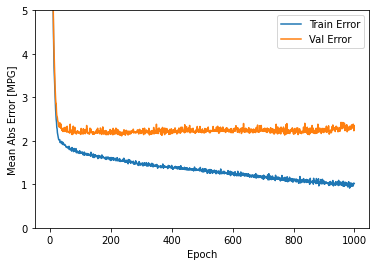

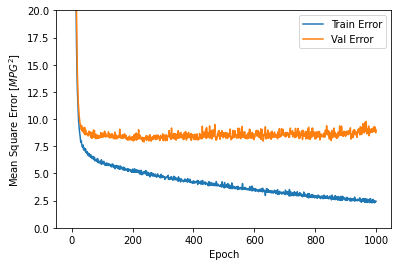

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

Este gráfico muestra poca mejora, o incluso degradación en el error de validación después de aproximadamente 100 épocas. Actualicemos la llamada model.fit para detener automáticamente el entrenamiento cuando el puntaje de validación no mejore. Utilizaremos una * devolución de llamada de EarlyStopping * que pruebe una condición de entrenamiento para cada época. Si transcurre una cantidad determinada de épocas sin mostrar mejoría, entonces detiene automáticamente el entrenamiento.


....................................................................

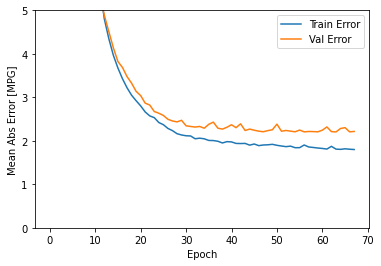

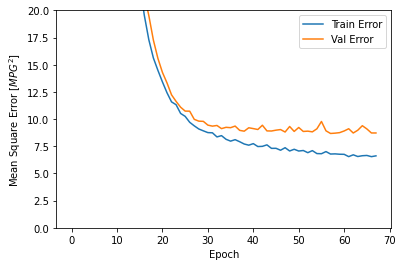

In [ ]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

## Predecir resultados

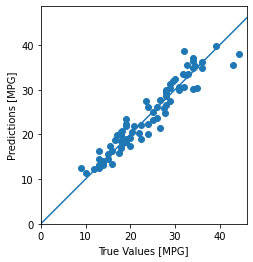

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


Podemos pintar un pequeño histograma con los errores cometidos respecto a los valores del conjunto de test.

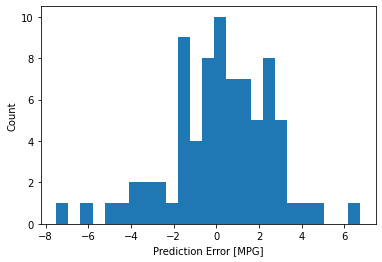

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

En la gráfica vemos como el grueso de las prediciones se centran en el rango [-2,2], y que pocos casos tiene un error más alto que este.